<a href="https://colab.research.google.com/github/alekhya-latech/NHIS/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective : Predict cancer(CANEV_A)

Description: This notebook presents a predictive model to determine whether an individual has a higher likelihood of having cancer based on their existing health conditions, economic status, and smoking habits. The study utilized a diverse dataset of 29482 individuals, incorporating medical records, socioeconomic information, and smoking behavior.

Feature selection was performed by using learning algorithms like decision tree, random forest, and logistic regression, to identify the most informative features.

Different types of cancers and the effect of a person's smoking habit on the likehood of having cancer is visualised




In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/adult21.csv")
#Replacing Don't Know/ Not ascertain/ Refused
data['CANEV_A'] = data['CANEV_A'].replace({
    1: 1,
    2: 0,
    7: None,
    8: None,
    9: None
})
#Removing NA
data = data.dropna(axis=0,subset=['CANEV_A'])
data = data.drop('HHX', axis=1)
print(len(data))
print(data['CANEV_A'].value_counts())

29453
0.0    25799
1.0     3654
Name: CANEV_A, dtype: int64


In [ ]:
#Removing attributes with more than 5000 missing attributes
remove_list = []
for i in range(len(data.columns)):
  column_name = data.columns[i]
  if((data[column_name].isnull().sum())>5000):
    remove_list.append(column_name)

data.drop(remove_list, axis=1, inplace=True)
print(len(data.columns))

203


In [ ]:
# Replacing missing with mode
for column_name in data.columns:
  missing_count = data[column_name].isnull().sum()
  if(missing_count!=0):
    print(column_name , missing_count)
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)

#Output:
# MAXEDUCP_A   Highest level of education of all the adults in the SA's family
# INCOTHR_A    Income from other sources
# INCRETIRE_A   Income from retirement
# INCWELF_A     Income from public assistance
# INCSSISSDI_A  Family income from SSDI
# INCSSRR_A     Income from SS/Railroad Retirement
# WRKHLTHFC_A   Currently volunteer or work in health care
# LIVEHEP_A     Live with someone with hepatitis
# DIBLAST1_A    Last time blood sugar test
# USPLKIND_A    Type of place for usual care
# WELLNESS_A    Was last visit a wellness visit
# HINOTYR_A     No health coverage during the past 12 months
# STEPS_A       Difficulty walking steps
# WLK13M_A      Difficulty walking 1/3 mile
# WLK100_A      Difficulty walking 100 yards
# HEARNYRM_A    Hearing conversation in noisy room

MAXEDUCP_A 85
INCOTHR_A 1219
INCRETIRE_A 1219
INCWELF_A 1219
INCSSISSDI_A 1219
INCSSRR_A 1219
WRKHLTHFC_A 2749
LIVEHEP_A 564
DIBLAST1_A 3133
USPLKIND_A 2793
WELLNESS_A 320
HINOTYR_A 2219
STEPS_A 2533
WLK13M_A 2709
WLK100_A 2533
HEARNYRM_A 40
HEARQTRM_A 29


In [ ]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = data['CANEV_A'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attribute ={}
for key in data.columns:
    gini_attribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attribute[key]:.3f}')



Gini for URBRRL is 0.217
Gini for RATCAT_A is 0.217
Gini for IMPINCFLG_A is 0.217
Gini for PPSU is 0.216
Gini for PSTRAT is 0.216
Gini for HISPALLP_A is 0.212
Gini for RACEALLP_A is 0.214
Gini for DISAB3_A is 0.215
Gini for K6SPD_A is 0.217
Gini for CITZNSTP_A is 0.216
Gini for LEGMSTAT_A is 0.211
Gini for MARSTAT_A is 0.211
Gini for PCNTADTWFP_A is 0.208
Gini for PCNTADTWKP_A is 0.208
Gini for FDSCAT4_A is 0.217
Gini for FDSCAT3_A is 0.217
Gini for EMPWRKLSW1_A is 0.209
Gini for SMKECIGST_A is 0.217
Gini for SMKCIGST_A is 0.215
Gini for BMICAT_A is 0.217
Gini for WEIGHTLBTC_A is 0.215
Gini for HEIGHTTC_A is 0.217
Gini for URGNT12MTC_A is 0.217
Gini for EMERG12MTC_A is 0.217
Gini for PCNT18UPTC is 0.216
Gini for PCNTLT18TC is 0.213
Gini for LSATIS4R_A is 0.217
Gini for LSATIS11R_A is 0.217
Gini for NOTCOV_A is 0.216
Gini for OTHGOV_A is 0.217
Gini for OTHPUB_A is 0.217
Gini for IHS_A is 0.217
Gini for MILITARY_A is 0.217
Gini for CHIP_A is 0.217
Gini for MEDICAID_A is 0.217
Gini for ME

In [ ]:
# Removed NUMCAN_A(Number of reported types of cancers) as it gave zero gini impurity and because of which every algorithm is giving an accuracy of 100%
data = data.drop('NUMCAN_A', axis =1)
print(len(data.columns))

202


In [ ]:
#Embedded Methods- LASSO(L1 Regularization)
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

y = data['CANEV_A']
X = data.drop('CANEV_A',axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.005)  # You can adjust the regularization strength with the alpha parameter
lasso.fit(X_scaled, y)

# Get the non-zero coefficient indices
selected_features_indices = lasso.coef_ != 0

# Print the names of the selected features
lasso = [X.columns[i] for i in range(len(X.columns)) if selected_features_indices[i]]
print("Selected Features: ", lasso)
print(len(lasso))

Selected Features:  ['URBRRL', 'RATCAT_A', 'HISPALLP_A', 'PCNTADTWFP_A', 'BMICAT_A', 'EMERG12MTC_A', 'OTHPUB_A', 'MEDICARE_A', 'MAXEDUCP_A', 'OVER65FLG_A', 'HISDETP_A', 'HISP_A', 'AGEP_A', 'INCRETIRE_A', 'NATUSBORN_A', 'SMELLCOMP_A', 'PAIFRQ3M_A', 'ANXFREQ_A', 'FAMCARE12M_A', 'SHTPNUEV_A', 'VIRAPP12M_A', 'HOSPONGT_A', 'WELLNESS_A', 'LASTDR_A', 'PAYWORRY_A', 'HIKIND10_A', 'HIKIND04_A', 'HEARNYRM_A', 'HEARINGDF_A', 'HEARAID_A', 'WEARGLSS_A', 'CURRESP_A', 'HLTHCOND_A', 'MEDRXTRT_A', 'DRYMTH12M_A', 'ARTHEV_A', 'MIEV_A', 'HYPEV_A', 'PHSTAT_A', 'POVRATTC_A']
40


In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gains = mutual_info_classif(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_scores.sort_values(by='Information Gain', ascending=False, inplace=True)
k = 40  # Number of features to select
gain = feature_scores['Feature'][:k].tolist()
print(gain)

['AGEP_A', 'MEDICARE_A', 'HIKIND02_A', 'OVER65FLG_A', 'INCSSRR_A', 'SHTPNUEV_A', 'POVRATTC_A', 'INCWRKO_A', 'PCNTADTWKP_A', 'PCNTADTWFP_A', 'EMPWRKLSW1_A', 'ARTHEV_A', 'INCRETIRE_A', 'HYPEV_A', 'HOUYRSLIV_A', 'HISPALLP_A', 'PARSTAT_A', 'PCNTKIDS_A', 'RX12M_A', 'HEARAID_A', 'LEGMSTAT_A', 'CHLEV_A', 'SOCWRKLIM_A', 'HIKIND10_A', 'NOTCOV_A', 'DIFF_A', 'FAMCARE12M_A', 'WEARGLSS_A', 'PHSTAT_A', 'CHOLLAST_A', 'HIKIND03_A', 'BPLAST_A', 'MIEV_A', 'SAPARENTSC_A', 'PCNTLT18TC', 'WTFA_A', 'HLTHCOND_A', 'MARSTAT_A', 'HISP_A', 'HISDETP_A']


In [ ]:
from scipy.stats import chi2_contingency

chi2_scores = []
p_values = []

for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
features_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
features_scores.sort_values(by='P-value', inplace=True)
k = 40  # Number of features to select
chi = features_scores['Feature'][:k].tolist()
print(chi)

['OVER65FLG_A', 'INCSSRR_A', 'AGEP_A', 'SHTPNUEV_A', 'HIKIND02_A', 'MEDICARE_A', 'INCRETIRE_A', 'PCNTADTWFP_A', 'INCWRKO_A', 'PCNTADTWKP_A', 'EMPWRKLSW1_A', 'ARTHEV_A', 'LEGMSTAT_A', 'MARSTAT_A', 'RX12M_A', 'HOUYRSLIV_A', 'HYPEV_A', 'DIFF_A', 'HIKIND03_A', 'PHSTAT_A', 'CHLEV_A', 'HISPALLP_A', 'PARSTAT_A', 'PCNTLT18TC', 'PCNTKIDS_A', 'HEARAID_A', 'POVRATTC_A', 'SHTFLU12M_A', 'SAPARENTSC_A', 'HEARNYRM_A', 'CHOLLAST_A', 'PAIFRQ3M_A', 'HEARINGDF_A', 'DIBLAST1_A', 'EQUIP_A', 'WEARGLSS_A', 'INCINTER_A', 'RACEALLP_A', 'SOCWRKLIM_A', 'HLTHCOND_A']


In [ ]:
from collections import Counter
selected_list = []
selected_count = Counter(chi+gain+lasso).most_common()
for i in selected_count:
  if(i[1]==3):
    selected_list.append(i[0])
print(selected_list)
print(len(selected_list))

['OVER65FLG_A', 'AGEP_A', 'SHTPNUEV_A', 'MEDICARE_A', 'INCRETIRE_A', 'PCNTADTWFP_A', 'ARTHEV_A', 'HYPEV_A', 'PHSTAT_A', 'HISPALLP_A', 'HEARAID_A', 'POVRATTC_A', 'WEARGLSS_A', 'HLTHCOND_A']
14


In [ ]:
print(len(data.columns))

202


In [ ]:
selected_list.append('CANEV_A')
for i in data.columns:
  if i not in selected_list:
    data = data.drop(i,axis=1)

print(data.columns)

Index(['HISPALLP_A', 'PCNTADTWFP_A', 'MEDICARE_A', 'OVER65FLG_A', 'AGEP_A',
       'INCRETIRE_A', 'PAIFRQ3M_A', 'SHTPNUEV_A', 'HEARAID_A', 'HLTHCOND_A',
       'ARTHEV_A', 'CANEV_A', 'HYPEV_A', 'PHSTAT_A', 'POVRATTC_A'],
      dtype='object')


# After feature Selection

In [ ]:
print(data.columns)
print(len(data))
print("Weights:" , (data['CANEV_A'].value_counts()[0])/len(data))

Index(['HISPALLP_A', 'PCNTADTWFP_A', 'MEDICARE_A', 'OVER65FLG_A', 'AGEP_A',
       'INCRETIRE_A', 'PAIFRQ3M_A', 'SHTPNUEV_A', 'HEARAID_A', 'HLTHCOND_A',
       'ARTHEV_A', 'CANEV_A', 'HYPEV_A', 'PHSTAT_A', 'POVRATTC_A'],
      dtype='object')
29453
Weights: 0.8759379350151089


In [ ]:

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=len(data),
    n_features=len(data.columns)-1,
    weights=[0.88],
    flip_y=0,
    random_state=42
)


Decision Tree
Accuracy: 76.71023595314888
Specificity: 0.8194820255121763


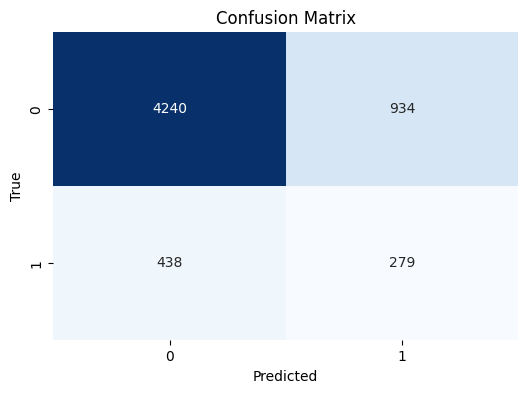

Recall/Sensitivity 0.3891213389121339
Precision: 0.23000824402308326
ROC: 0.6043016822121552
0.7671023595314888 	 0.3891213389121339 	 0.23000824402308326 	 0.6043016822121552 	 0.8194820255121763
Epoch 1/10
1290/1290 [==============================] - 4s 2ms/step - loss: 0.4094
Epoch 2/10
1290/1290 [==============================] - 3s 2ms/step - loss: 0.1894
Epoch 3/10
1290/1290 [==============================] - 2s 2ms/step - loss: 0.1864
Epoch 4/10
1290/1290 [==============================] - 2s 2ms/step - loss: 0.1845
Epoch 5/10
1290/1290 [==============================] - 2s 2ms/step - loss: 0.1809
Epoch 6/10
1290/1290 [==============================] - 2s 2ms/step - loss: 0.1762
Epoch 7/10
1290/1290 [==============================] - 4s 3ms/step - loss: 0.1751
Epoch 8/10
1290/1290 [==============================] - 4s 3ms/step - loss: 0.1711
Epoch 9/10
1290/1290 [==============================] - 2s 2ms/step - loss: 0.1707
Epoch 10/10
185/185 [==============================] - 0

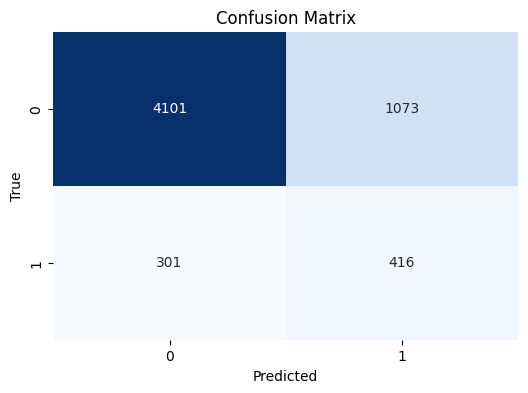

ROC: 0.7630331951572045
0.7667628585978612 	 0.5801952580195258 	 0.2793821356615178 	 0.7630331951572045 	 0.7926169308078855
Naive BAyes
Accuracy: 73.43405194364284
Recall 0.6750348675034867
Precision: 0.2665198237885463
ROC: 0.708796908046293
0.7343405194364284 	 0.6750348675034867 	 0.2665198237885463 	 0.708796908046293 	 0.7425589485890993
KNN
Accuracy: 69.12239008657274
Recall 0.6889818688981869
Precision: 0.23636363636363636
ROC: 0.6902582324776979
0.6912239008657274 	 0.6889818688981869 	 0.23636363636363636 	 0.6902582324776979 	 0.6915345960572091
AdaBoost
Accuracy: 76.08215922593787
Recall 0.5676429567642957
Precision: 0.2702523240371846
ROC: 0.6776173809720203
0.7608215922593787 	 0.5676429567642957 	 0.2702523240371846 	 0.6776173809720203 	 0.7875918051797449
GradientBoost
Accuracy: 75.89543371244271
Recall 0.5788005578800558
Precision: 0.27071102413568165
ROC: 0.6813600779350028
0.7589543371244271 	 0.5788005578800558 	 0.27071102413568165 	 0.6813600779350028 	 0.78391

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 70.3276184009506
[[3655 1519]
 [ 229  488]]


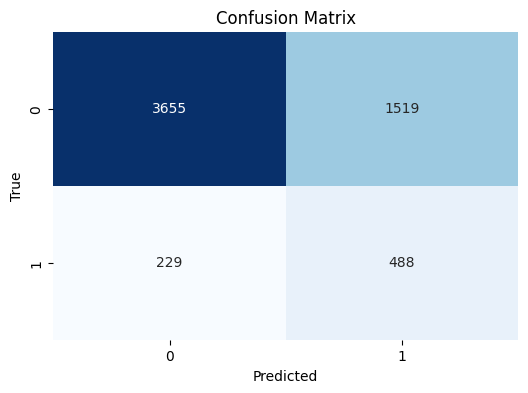

Recall 0.6806136680613668
Precision: 0.24314897857498755
ROC: 0.6935151834701886
0.703276184009506 	 0.6806136680613668 	 0.24314897857498755 	 0.6935151834701886 	 0.7064166988790105


In [ ]:
from imblearn.over_sampling import SMOTE
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('CANEV_A', axis=1), data['CANEV_A'], test_size=0.2, random_state=42)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
#print("Logistic Regression")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


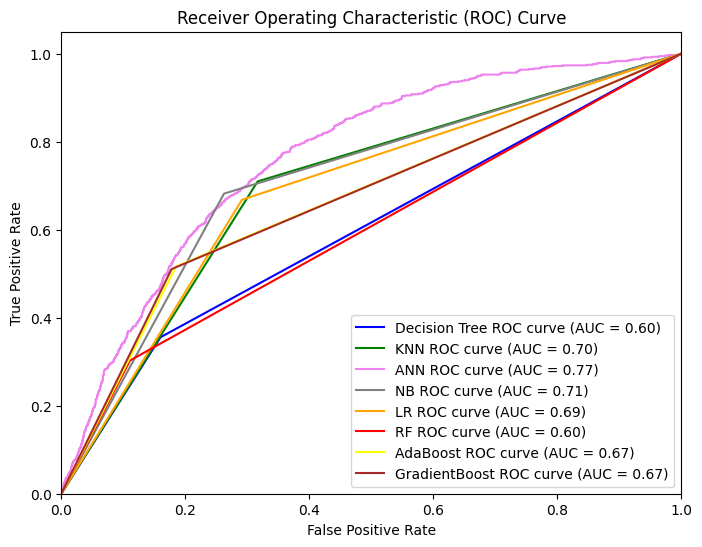

In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='yellow', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='brown', label='GradientBoost ROC curve (AUC = %0.2f)' % gb_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Decision Tree
Accuracy: 43.50704464437277
Specificity: 0.37785079242365677
Recall/Sensitivity 0.8479776847977685
Precision: 0.1588711784687745
ROC: 0.6129142386107126
0.4350704464437277 	 0.8479776847977685 	 0.1588711784687745 	 0.6129142386107126 	 0.37785079242365677
Epoch 1/10
184/184 [==============================] - 1s 2ms/step - loss: 0.4248
Epoch 2/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 3/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1700
Epoch 4/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1683
Epoch 5/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1567
Epoch 6/10
184/184 [==============================] - 0s 1ms/step - loss: 0.1544
Epoch 7/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1713
Epoch 8/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1641
Epoch 9/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1550


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


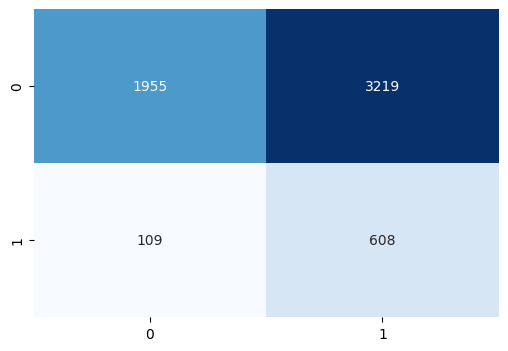

In [ ]:
from imblearn.under_sampling import ClusterCentroids
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('CANEV_A', axis=1), data['CANEV_A'], test_size=0.2, random_state=42)

cc = ClusterCentroids()
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Logistic Regression")
print("Accuracy:", accuracy*100)


# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


['COLRCCAN_A', 'HDNCKCAN_A', 'UTERUCAN_A', 'THYROCAN_A', 'THROACAN_A', 'STOMACAN_A', 'SKNDKCAN_A', 'SKNNMCAN_A', 'SKNMCAN_A', 'RECTUCAN_A', 'PROSTCAN_A', 'PANCRCAN_A', 'OVARYCAN_A', 'MOUTHCAN_A', 'MELANCAN_A', 'LYMPHCAN_A', 'LUNGCAN_A', 'LIVERCAN_A', 'LEUKECAN_A', 'LARYNCAN_A', 'GALLBCAN_A', 'ESOPHCAN_A', 'COLONCAN_A', 'CERVICAN_A', 'BREASCAN_A', 'BRAINCAN_A', 'BONECAN_A', 'BLOODCAN_A', 'BLADDCAN_A']
[198, 48, 117, 119, 31, 19, 195, 789, 328, 16, 445, 15, 80, 14, 189, 122, 115, 21, 54, 4, 5, 11, 185, 160, 698, 23, 30, 25, 121]


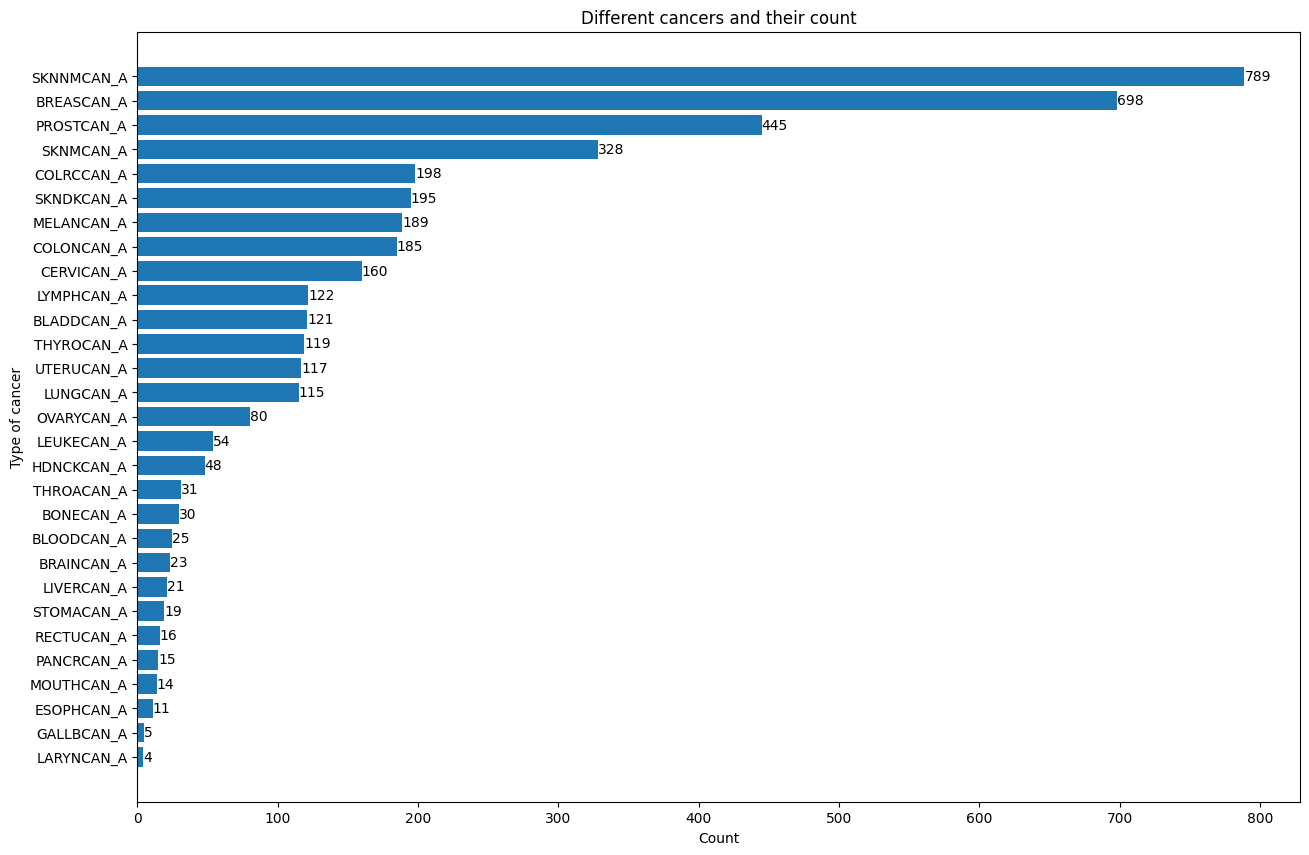

In [ ]:
#Different types of cancers and their count
from matplotlib import pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/adult21.csv")
df = df.drop('NUMCAN_A',axis =1)

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i])

cancer_type = []
count = []
i = 0
while(i<621):
  col_name = df.columns[i]
  if "CAN_A" in col_name:
    yes_count = df[col_name].value_counts()[1]
    cancer_type.append(col_name)
    count.append(yes_count)
  i= i+1
print(cancer_type)
print(count)
type_df = pd.DataFrame({"Type of cancer":cancer_type,
                  "Count":count})

df_sorted= type_df.sort_values('Count')
plt.figure(figsize = (15, 10))
plt.barh("Type of cancer", "Count", data= df_sorted)
# addlabels(cancer_type, count)
for i, cnt in enumerate(df_sorted['Count']):
    plt.text(cnt, i, str(cnt), ha='left', va='center')

plt.title("Different cancers and their count")

plt.xlabel("Count")
plt.ylabel("Type of cancer")

    # visualizing the plot
plt.show()

#Output
# Skin non melanoma cancer,  breast cancer, prostate cancer, Skin melanoma cancer, Colorectal cancer,  Skin cancer (don't know what kind),
# Melanoma cancer, colon cancer,  cervical cancer,  lymphoma cancer,  Bladdercancer, Thyroid cancer,  Utereus cancer, lung cancer, ovarian cancer,
# Leukemia, Head and neck cancers, Thorat cancer, bone cancer,  blood cancer,  brain cancer,  liver cancer, Stomach cancer,  Rectal cancer,
# pancreatic cancer, mouth cancer, esophagus cancer, gall bladder cancer, laryn cancer



In [ ]:
#Smoking related cancer
#Smoking Habit
cancer = df[df['CANEV_A']==1]
print("Number of People with cancer:", len(cancer))
smoke_and_cancer = df[(df['CANEV_A']==1) & (df['SMKEV_A']==1)]
print("Smoke and have cancer :",len(smoke_and_cancer))
nsmoke_cancer = df[(df['CANEV_A']==1) & (df['SMKEV_A']==2)]
print("Doesn't smoke but have cancer:", len(nsmoke_cancer))
# Considered bladder cancer, cervican cancer, colon cancer, esophagus cancer, pancreatic cancer, rectul cancer, stomach cancer, throat cancer
# and Colorectal cancer as smoking related cancer
smoking_related_cancer = df[(df['BLADDCAN_A']==1.0) | (df['CERVICAN_A']==1.0)  | (df['COLONCAN_A']==1.0) | (df['ESOPHCAN_A']==1.0) |
            (df['LARYNCAN_A']==1.0) | (df['LIVERCAN_A']==1.0) | (df['LUNGCAN_A']==1.0) | (df['MOUTHCAN_A']==1.0) |
            (df['PANCRCAN_A']==1.0) | (df['RECTUCAN_A']==1.0) | (df['STOMACAN_A'] ==1.0) | (df['THROACAN_A']==1.0) |
            (df['COLRCCAN_A']==1.0)]
print("People with smoking related cancer:", len(smoking_related_cancer))
print("Smoking related cancer and have smoking habit:", len(smoking_related_cancer[smoking_related_cancer['SMKEV_A']==1]))
print("Smoking related cancer and doesn't have smoking habit:", len(smoking_related_cancer[smoking_related_cancer['SMKEV_A']==2]))

#About one sixth of people suffering with cancer have cancer related to smoking
#Almost 50% of people with cancer have smoking habit
#Two thirds of people with smoking related cancer have smoking habit

Number of People with cancer: 3654
Smoke and have cancer : 1743
Doesn't smoke but have cancer: 1828
People with smoking related cancer: 677
Smoking related cancer and have smoking habit: 421
Smoking related cancer and doesn't have smoking habit: 237


Text(0, 0.5, 'Count')

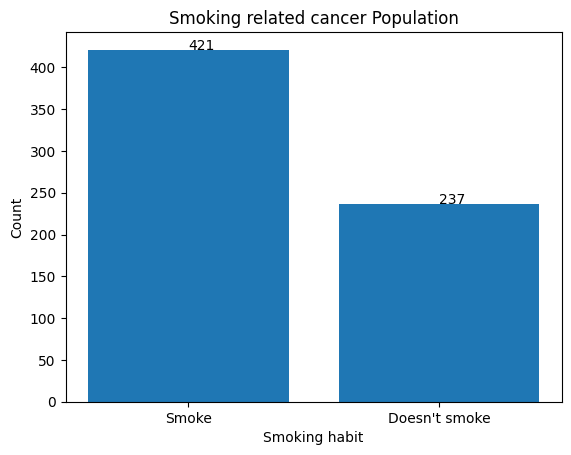

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = ["Smoke", "Doesn't smoke"]
y = [len(smoking_related_cancer[smoking_related_cancer['SMKEV_A']==1]),len(smoking_related_cancer[smoking_related_cancer['SMKEV_A']==2])]
plt.bar(x,y)
plt.title("Smoking related cancer Population")
addlabels(x, y)
plt.xlabel("Smoking habit")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

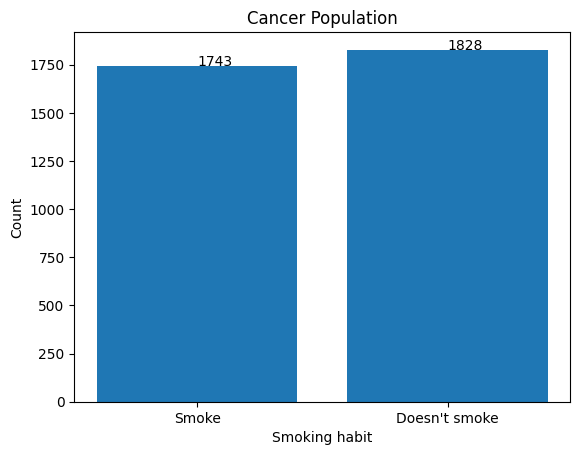

In [ ]:
x = ["Smoke", "Doesn't smoke"]
y = [len(smoke_and_cancer),len(nsmoke_cancer)]
plt.bar(x,y)
plt.title("Cancer Population")
addlabels(x, y)
plt.xlabel("Smoking habit")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

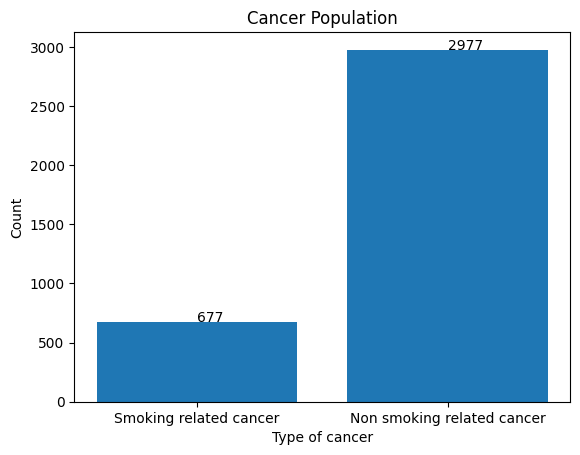

In [ ]:
x = ["Smoking related cancer", "Non smoking related cancer"]
y = [len(smoking_related_cancer),len(cancer)-len(smoking_related_cancer)]
plt.bar(x,y)
plt.title("Cancer Population")
addlabels(x, y)
plt.xlabel("Type of cancer")
plt.ylabel("Count")